In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


1. Histogram

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

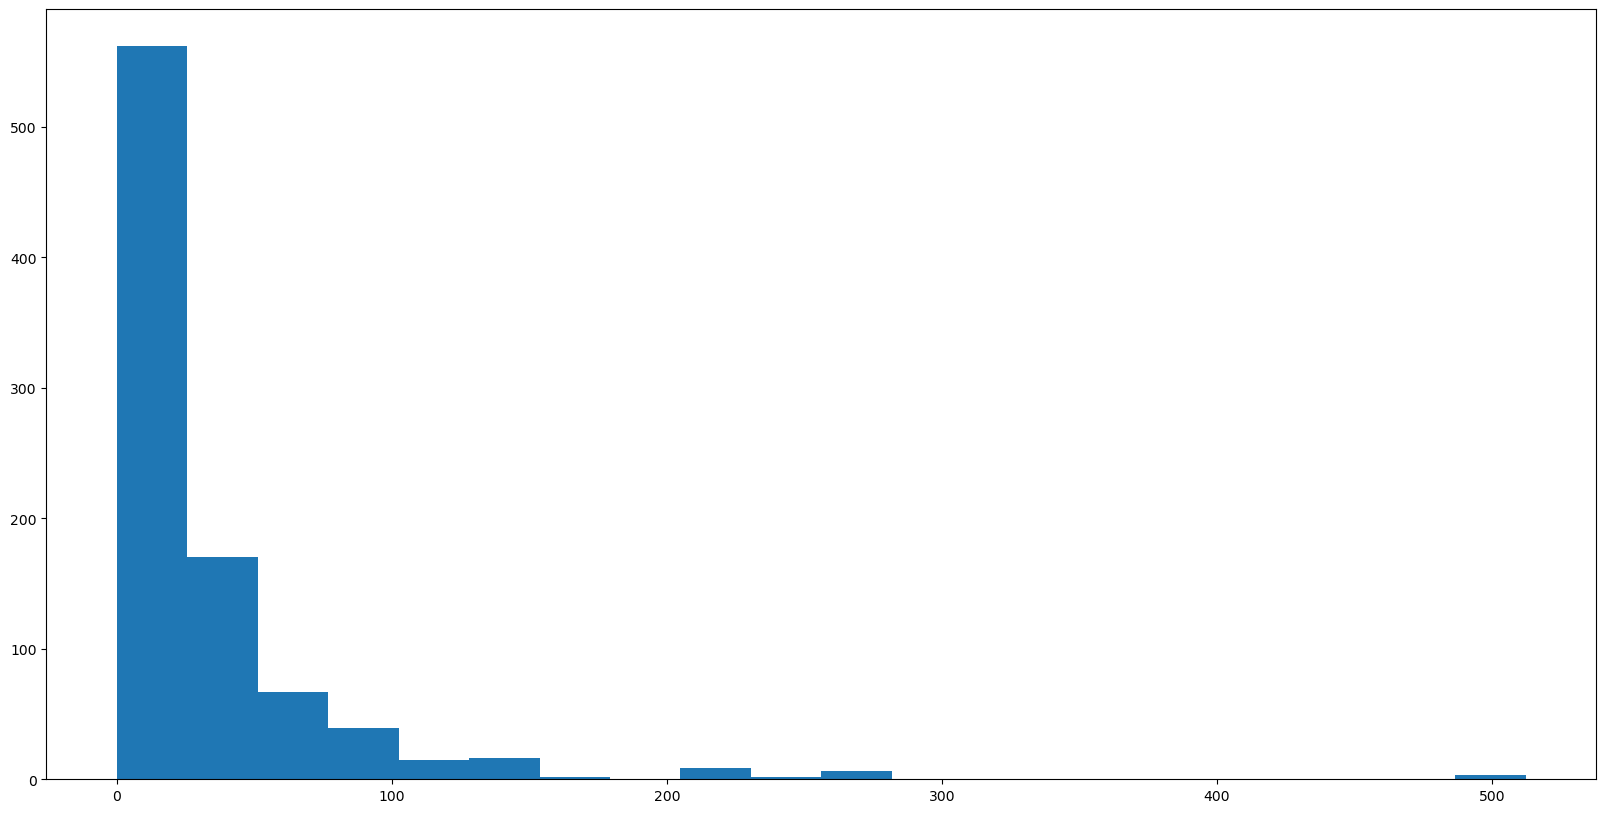

In [4]:
plt.figure(figsize = (20,10))
plt.hist(fare_values, bins = 20)
plt.hist

2. Średnia

In [7]:
mean_fare = np.round(np.mean(fare_values))
print(f"Średnia opłata za podróż Titanicem wynosiła {mean_fare} funty.")

Średnia opłata za podróż Titanicem wynosiła 32.0 funty


3. Mediana

In [9]:
median_fare = np.median(fare_values)
print(f"Wartość mediany do zbioru Fare wynosi {median_fare}.")

Wartość mediany do zbioru Fare wynosi 14.4542.


4. Dominanta (Moda)

In [41]:
mode_fare = stats.mode(fare_values, keepdims=True)
mode_fare

ModeResult(mode=array([8.05]), count=array([43]))

5. Kwartyle

In [26]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


6. Histogram z w/w danymi.

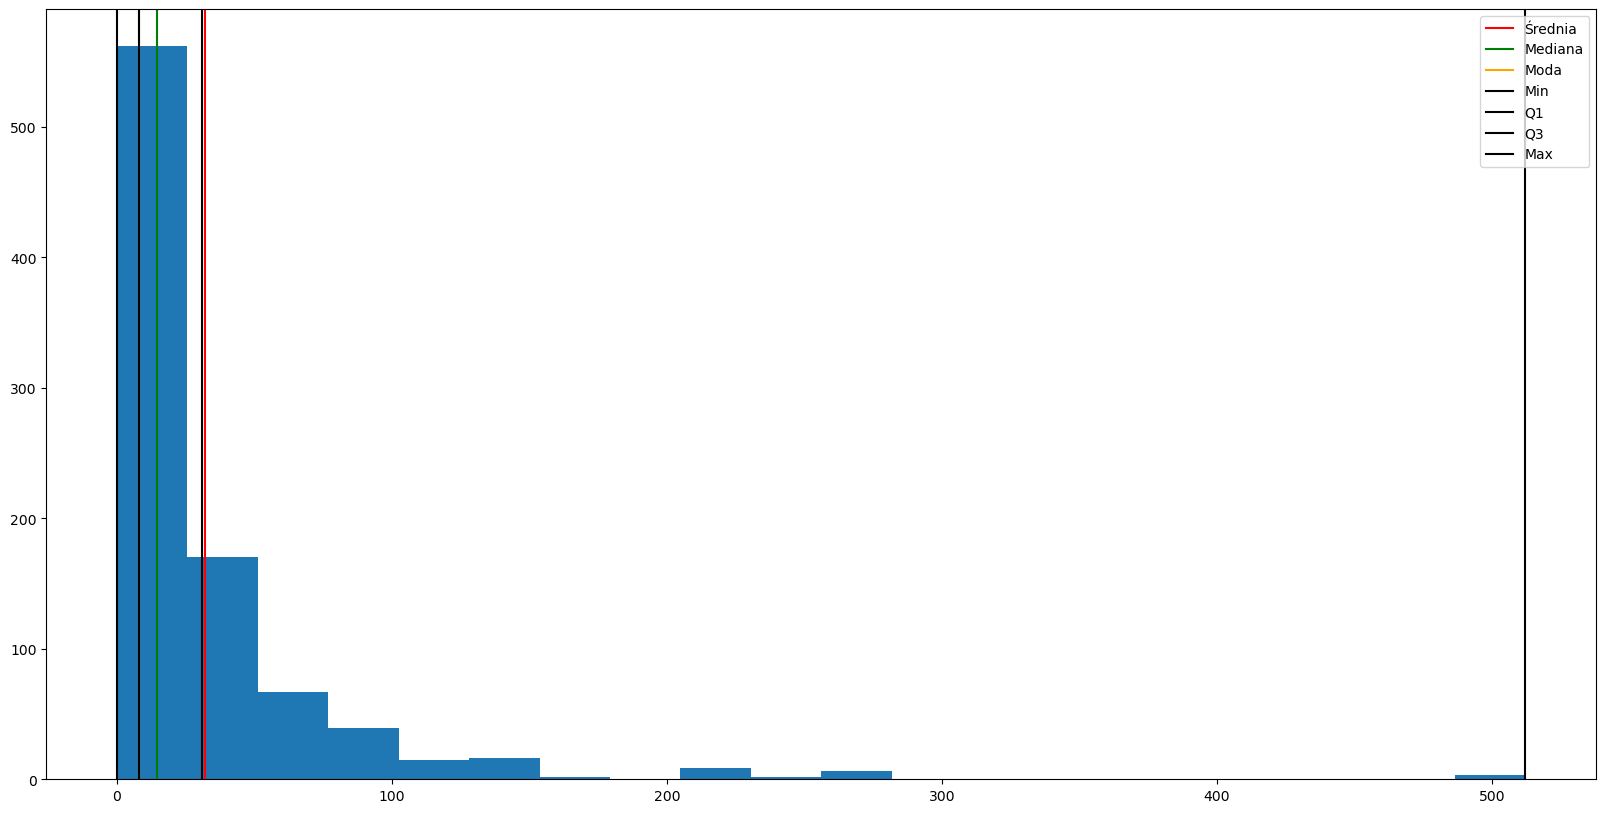

In [27]:
plt.figure(figsize = (20,10))
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

7. Zakres

In [29]:
range_fare = max(fare_values) - min(fare_values)
print(f"Wartość zakresu wynosi {range_fare}.")

Wartość zakresu wynosi 512.3292.


8. Rozstęp międzykwartylowy - IQR

In [30]:
iqr = q3 - q1
print(f"IQR = {iqr}")

IQR = 23.0


9. Wykres pudełkowy

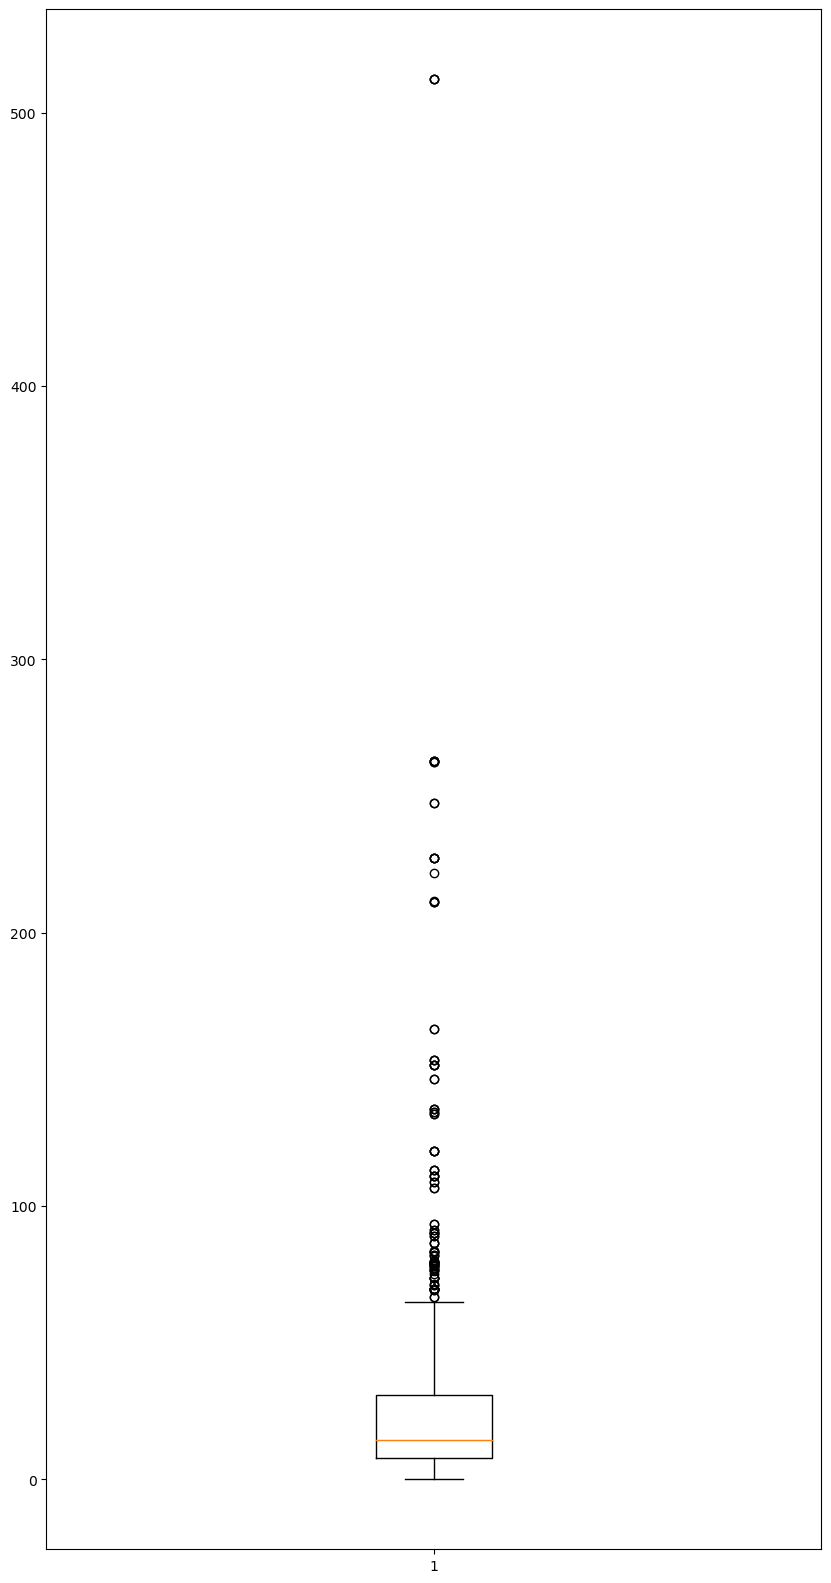

In [35]:
plt.figure(figsize=(10,20))
plt.boxplot(fare_values)
plt.show()

10. Wariancja

In [36]:
variance_fare = np.var(fare_values, ddof=1)
print(f"Wariancja zbioru wynosi {variance_fare}.")

Wariancja zbioru wynosi 2469.436845743116.


11. Odchylenie standardowe

In [37]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(f"Odchylenie standardowe wynosi {standard_deviation_fare}.")

Odchylenie standardowe wynosi 49.6934285971809.


12. Asymetria rozkładu

In [48]:
Ws = (q3-median_fare) - (median_fare-q1)
Ws

10.0916

In [49]:
Ws = mean_fare - 8.05
Ws

23.95

Z powyższego wykresu oraz wykonanych obliczeń można stwierdzić że zbiór charakteryzuje się rozkładem o skośnosci dodatniej (prawostronnej)

13. Skalowanie zmiennej

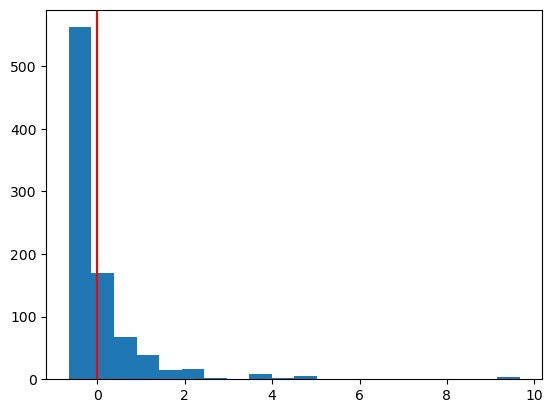

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [50]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

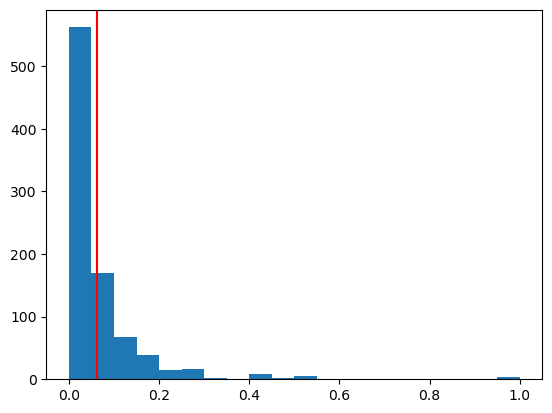

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [51]:
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x = normalized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')

14. Korelacja

In [57]:
sibsb_values = dataset.loc[dataset['Fare'].notnull(), 'Pclass'].values
stats.pearsonr(fare_values, sibsb_values)

PearsonRResult(statistic=-0.5494996199439077, pvalue=1.9673861734207248e-71)

In [ ]:
print("Korelacja pomiędzy wartością opłaty a klasą pasażera wynosi ~ -55 %")